Given a set of corresponding points between two images, compute 
the homography matrix. Use this matrix to warp one image onto 
another, and display the original and warped images.

In [ ]:
import cv2
import numpy as np

# Load the two images
img1 = cv2.imread('image.png')  # Target image (to warp onto)
img2 = cv2.imread('img1.png')  # Source image (to be warped)

# Define corresponding points (x, y) in img1 and img2
# Format: [[x1, y1], [x2, y2], ...] (at least 4 points required)
pts_src = np.array([[50, 50], [200, 50], [200, 200], [50, 200]])  # Points in img2 (source)
pts_dst = np.array([[70, 80], [220, 60], [210, 220], [60, 210]])  # Points in img1 (destination)

# Compute homography matrix
H, _ = cv2.findHomography(pts_src, pts_dst)

# Warp img2 (source) onto img1 (target)
h, w = img1.shape[:2]
warped_img = cv2.warpPerspective(img2, H, (w, h))

# Blend the two images (optional)
blended = cv2.addWeighted(img1, 0.5, warped_img, 0.5, 0)

# Display results
cv2.imshow('Original Image (Target)', img1)
cv2.imshow('Original Image (Source)', img2)
cv2.imshow('Warped Image', warped_img)
cv2.imshow('Blended Result', blended)
cv2.waitKey(0)
cv2.destroyAllWindows()

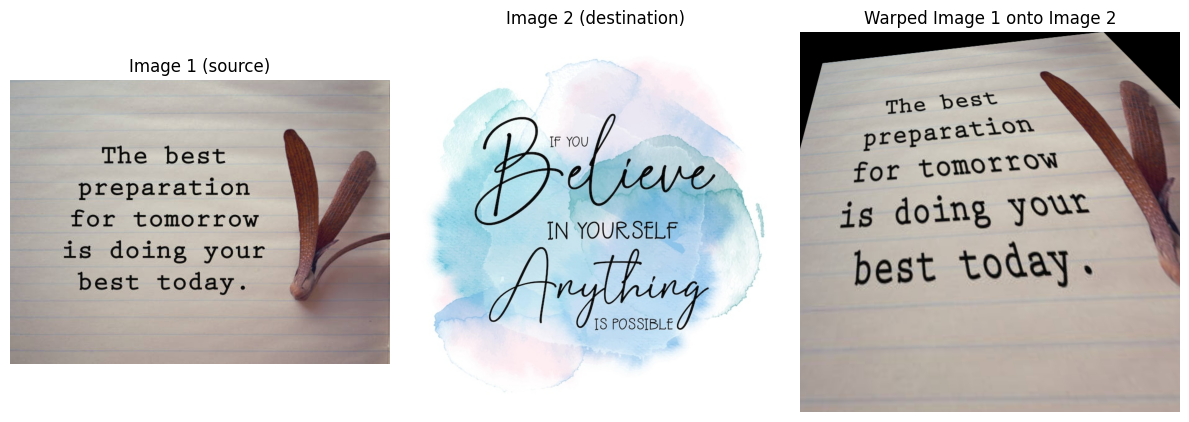

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images (you can replace with any two overlapping images)
img1 = cv2.imread('image.png')  # Source image
img2 = cv2.imread('img1.png')  # Destination image (where we want to warp img1)

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both images not found. Check the file paths.")

# Convert images to RGB for display
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Manually define corresponding points (for example purposes)
# Replace these with your own matched points or from a keypoint matcher
pts_img1 = np.float32([
    [100, 100],
    [200, 100],
    [200, 200],
    [100, 200]
])

pts_img2 = np.float32([
    [120, 130],
    [220, 120],
    [230, 230],
    [110, 240]
])

# Compute the homography matrix
H, status = cv2.findHomography(pts_img1, pts_img2)

# Warp img1 onto img2 using the homography matrix
warped_img1 = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
warped_img1_rgb = cv2.cvtColor(warped_img1, cv2.COLOR_BGR2RGB)

# Plot original and warped images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Image 1 (source)")
plt.imshow(img1_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2 (destination)")
plt.imshow(img2_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Warped Image 1 onto Image 2")
plt.imshow(warped_img1_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
